In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils.classify_points import classify_points
from path_find_algorithms.a_star import a_star
from utils.extract_track_borders import extract_track_borders
from utils.center_line import get_center_line


In [10]:
with open('../../../to_be_saved/occupancy_grid.npy', 'rb') as f:
    occupancy_grid = np.load(f)

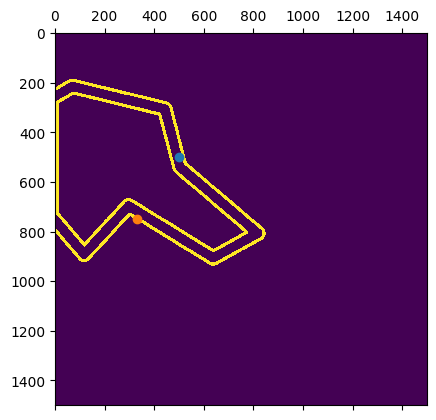

In [11]:
occupancy_grid_filtered = (occupancy_grid >30)*1
plt.matshow(occupancy_grid_filtered)
#plt.matshow(np.flip(occupancy_grid_filtered, 0))
plt.scatter(500,500)
plt.scatter(330, 750)

In [12]:
def get_world_frame_point(point, resolution, origin):
    point_x = (point[0] * resolution) + origin[0]
    point_y = (point[1] * resolution) + origin[1]
    return (point_x, point_y)

def world_frame_point_to_occupancy_grid_coordinates(point, resolution, origin):
    point_x = int((point[0] - origin[0]) /
                  resolution)

    point_y = int((point[1] - origin[1]) /
                  resolution)

    return (point_x, point_y)



In [13]:
print(get_world_frame_point((300,800), 0.05, (-24.95, -24.95)))
print(world_frame_point_to_occupancy_grid_coordinates((-9.375,13.175), 0.05, (-24.95, -24.95)))



(-9.95, 15.05)
(311, 762)


In [14]:
classified_grid = classify_points((311,762),occupancy_grid_filtered)
plt.matshow(classified_grid)

KeyboardInterrupt: 

In [ ]:
for i in range(300):
    if classified_grid[i, 200] == 1:
        print(i)

print(get_world_frame_point((200,160), 0.05, (-24.95, -24.95)))

148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
(-14.95, -16.95)


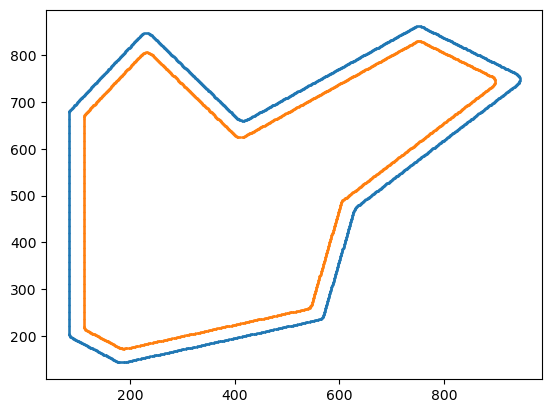

In [ ]:
lines = extract_track_borders(classified_grid)

for line in lines:
    plt.scatter([p[0] for p in line], [p[1] for p in line], s=0.2)

backsolve_path


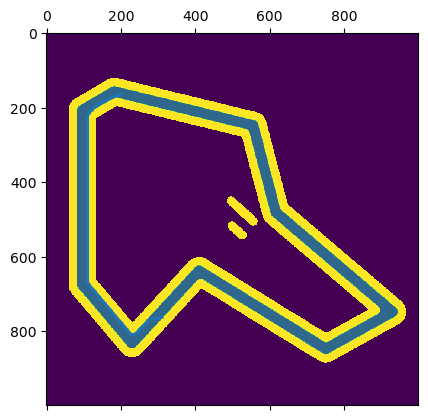

In [ ]:
path = a_star((311, 762), (200, 160), classified_grid)
plt.matshow(classified_grid)

plt.scatter([p[1] for p in path], [p[0] for p in path], s=0.5)

In [15]:
import numpy as np
import heapq


def a_star_non_classified_grid(start, goal, binary_occupancy_map: np.ndarray):
    start = (start[1], start[0])
    goal = (goal[1], goal[0])

    assert binary_occupancy_map[start] == 1 and binary_occupancy_map[goal] == 1

    # allow moves in all directions
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0),
                 (1, 1), (1, -1), (-1, 1), (-1, -1)]

    open_heap = []
    closed_set = set()

    came_from = {}

    # add initial point to open list
    gscore = {start: 0}
    fscore = {start: _heuristic(start, goal)}

    heapq.heappush(open_heap, (fscore[start], start))

    while open_heap:
        current = heapq.heappop(open_heap)[1]

        # reached goal -> backwards calculate path
        if current == goal:
            return _backsolve_path(current, came_from)

        # Continue path finding
        closed_set.add(current)

        # go over all neighbors
        for i, j in neighbors:
            neighbor = current[0]+i, current[1]+j

            tentative_g_score = gscore[current] + _heuristic(current, neighbor)

            if not _check_new_point((neighbor[1], neighbor[0]), binary_occupancy_map):
                continue

            if neighbor in closed_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in open_heap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + \
                    _heuristic(neighbor, goal)

                heapq.heappush(open_heap, (fscore[neighbor], neighbor))


def _heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)


def _backsolve_path(end, came_from):
    print("backsolve_path")
    current = end
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    return path


def _check_new_point(point, classified_grid: np.ndarray):
    if point[0] < 0 or point[0] > classified_grid.shape[1]:
        return False
    if point[1] < 0 or point[1] > classified_grid.shape[0]:
        return False
    if classified_grid[point[1], point[0]] != 1:
        return False

    return True


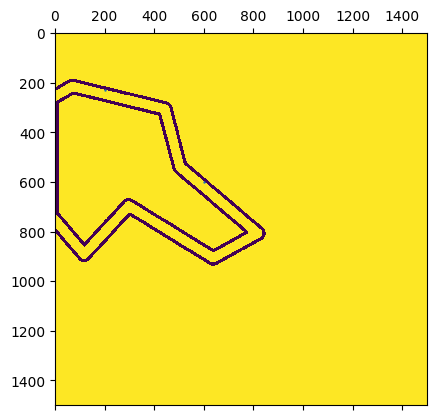

In [20]:
plt.matshow(occupancy_grid_filtered)
path = [(230,200), (600,600)]
plt.scatter([p[1] for p in path], [p[0] for p in path], s=0.5)

In [21]:
occupancy_grid_filtered = (occupancy_grid < 30)*1
path = a_star_non_classified_grid((200, 230), (600, 600), occupancy_grid_filtered)

backsolve_path


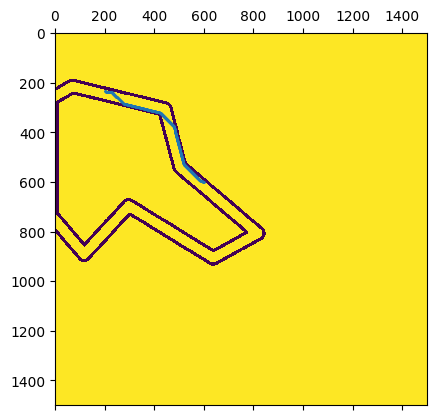

In [22]:
plt.matshow(occupancy_grid_filtered)
plt.scatter([p[1] for p in path], [p[0] for p in path], s=0.5)
